In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as mth
import sklearn.metrics as skl

In [2]:
x=np.linspace(start=0,stop=1,num=100)

In [3]:
def pdf(x,std,mean):
    return (np.exp(-((x-mean)**2)/(2*std*std))/(std*np.sqrt(2*3.14)))

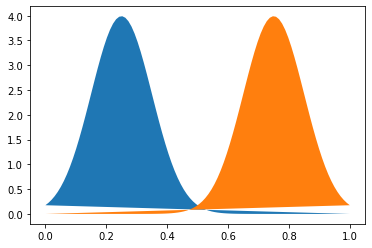

In [4]:

# for i in x:
#      pdf(i/,0.1,0.4)
plt.fill(x,pdf(x,0.1,0.25)) 
plt.fill(x,pdf(x,0.1,0.75))

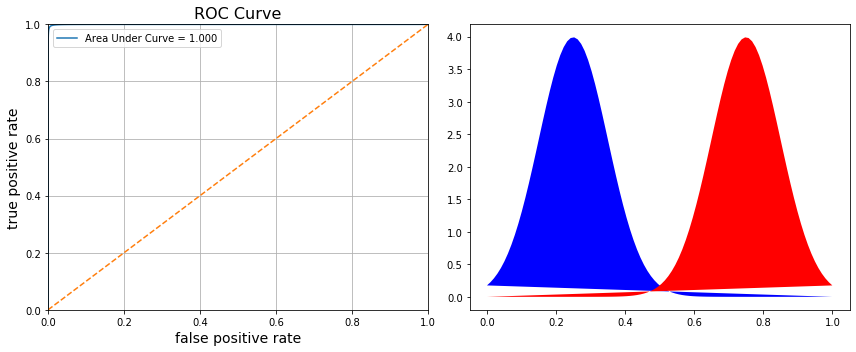

In [5]:
def ROC_PLOT(normal_gc,disease_gc,ax):
    total_disease=np.sum(disease_gc)
    total_normal=np.sum(normal_gc)
    cumulative_TP=0
    cumulative_FP=0
    TPR_array=[]
    FPR_array=[]
    for counter in range(len(x)):
        if disease_gc[counter]>0:
            cumulative_TP+=disease_gc[len(x)-1-counter]
            cumulative_FP+=normal_gc[len(x)-1-counter]
        FPR_counter=cumulative_FP/total_normal
        TPR_counter=cumulative_TP/total_disease
        TPR_array.append(TPR_counter)
        FPR_array.append(FPR_counter)
    area_under_ROC=skl.auc(FPR_array,TPR_array)
    ax.plot(FPR_array,TPR_array)
    ax.plot(x,x,"--")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_title('ROC Curve',fontsize=16)
    ax.set_ylabel('true positive rate',fontsize=14)
    ax.set_xlabel('false positive rate',fontsize=14)
    ax.grid()
    ax.legend(['Area Under Curve = %.3f'% area_under_ROC])
fig,axis=plt.subplots(1,2,figsize=(12,5))
a= 0.25
b= 0.75
ROC_PLOT(pdf(x,0.1,a),pdf(x,0.1,b),axis[0])
plt.fill(x,pdf(x,0.1,a),"b") 
plt.fill(x,pdf(x,0.1,b),"r")
plt.tight_layout()